In [18]:
import csv
import ast
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
images = np.empty((0, 26, 34), dtype=np.uint8)
labels = np.empty((0), dtype=np.uint8)

In [20]:
with open('dataset_eye_on_off.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  i = 0 
  for lines in csvFile:
        if(i != 0):
            image = ast.literal_eval(lines[1])
            image = np.reshape(image, (26, 34)).astype(np.uint8)  
            images = x = np.append(images, [image], axis=0)

            label = lines[0]
            if label == 'open':
              labels = np.append(labels, 1)
            else:
              labels = np.append(labels, 0)
        i += 1

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train data shape: (2299, 26, 34)
Test data shape: (575, 26, 34)
Train labels shape: (2299,)
Test labels shape: (575,)


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [23]:
# Model tanımlanır
model=Sequential()
#CNN ve pooling katmanları eklenir
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(26, 34, 1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))
#Flatten katmanı eklenir
model.add(Flatten( ))
model.add(Dense(128,activation='relu') )
model.add(Dense(1,activation='sigmoid') )
# Model compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
learnedmodel=model.fit(train_data,train_labels,batch_size=10,epochs=32,validation_split=0.2)

Epoch 1/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8230 - loss: 1.8970 - val_accuracy: 0.9000 - val_loss: 0.2996
Epoch 2/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9438 - loss: 0.1592 - val_accuracy: 0.9522 - val_loss: 0.1319
Epoch 3/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9687 - loss: 0.1243 - val_accuracy: 0.9674 - val_loss: 0.1108
Epoch 4/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9819 - loss: 0.0706 - val_accuracy: 0.9804 - val_loss: 0.0894
Epoch 5/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9812 - loss: 0.0600 - val_accuracy: 0.9804 - val_loss: 0.0617
Epoch 6/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0686 - val_accuracy: 0.9674 - val_loss: 0.0909
Epoch 7/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9759 - loss: 0.0659 - val_accuracy: 0.9587 - val_loss: 0.0982
Epoch 8/32
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.0668 - val_accuracy: 0.

In [25]:
model.save("my_model.keras")

In [31]:
from keras import models
import cv2
reconstructed_model = models.load_model("my_model.keras")

In [44]:
test_loss, test_accuracy = reconstructed_model.evaluate(test_data, test_labels)

print(f'Test Kaybı: {test_loss}, Test Doğruluğu: {test_accuracy}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0852      
Test Kaybı: 0.1350734531879425, Test Doğruluğu: 0.9808695912361145


In [43]:

import numpy as np
from keras.preprocessing.image import img_to_array
image = cv2.imread('C:/Users/SELCUK/Desktop/dersler/gercek/gorsel.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (34, 26)).astype(np.uint8)   # width ve height modelin girdi boyutu

# Görseli uygun formata dönüştür
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
predictions = reconstructed_model.predict(image)
class_labels = {0: "Kapalı", 1: "Açık"}
class_index = np.argmax(predictions[0].astype(np.uint8))
print(class_index)
print(predictions[0].astype(np.uint8)  )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0
[1]


In [27]:
# Test verisi ile değerlendirme
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

print(f'Test Kaybı: {test_loss}, Test Doğruluğu: {test_accuracy}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0852      
Test Kaybı: 0.1350734531879425, Test Doğruluğu: 0.9808695912361145


In [28]:
# Test verisi için tahmin yapma
predictions = model.predict(test_data)

# Tahminleri ikili sınıflandırma için 0 veya 1'e yuvarlayın
predicted_labels = (predictions > 0.5).astype(np.uint8)

# İlk 10 tahmin ile gerçek etiketleri karşılaştırma
for i in range(10):
    print(f'Tahmin: {predicted_labels[i][0]}, Gerçek: {test_labels[i]}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tahmin: 0, Gerçek: 0
Tahmin: 1, Gerçek: 1
Tahmin: 1, Gerçek: 1
Tahmin: 0, Gerçek: 0
Tahmin: 1, Gerçek: 1
Tahmin: 1, Gerçek: 1
Tahmin: 1, Gerçek: 1
Tahmin: 1, Gerçek: 1
Tahmin: 1, Gerçek: 1
Tahmin: 1, Gerçek: 1


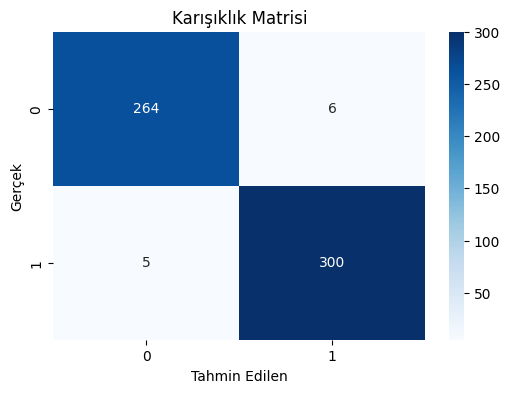

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisini hesapla
cm = confusion_matrix(test_labels, predicted_labels)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


In [30]:
from sklearn.metrics import classification_report

# Sınıflandırma raporu
print(classification_report(test_labels, predicted_labels, target_names=['Sınıf 0', 'Sınıf 1']))


              precision    recall  f1-score   support

     Sınıf 0       0.98      0.98      0.98       270
     Sınıf 1       0.98      0.98      0.98       305

    accuracy                           0.98       575
   macro avg       0.98      0.98      0.98       575
weighted avg       0.98      0.98      0.98       575

